In [1]:
import pandas as pd
import numpy as np

In [2]:
import src

In [3]:
%pwd

'C:\\Users\\bjk1y13\\OneDrive - University of Southampton\\MH028_UHS_Weather\\4_Analysis\\EDclassification\\notebooks'

In [4]:
def load_pickle_preprocessed_data(path):
    """
    Load pickled data for modelling.
    
    Input
    =====
    path, str, to fodler where data is located.
    
    Output
    ======
    X_train,dataframe, 
    X_test,dataframe, 
    y_train,dataframe, 
    y_test, dataframe, 
    
    """
    #### load each data file
    X_train = pd.read_pickle(path + 'X_train.pkl')
    X_test = pd.read_pickle(path + 'X_test.pkl')
    y_train = pd.read_pickle(path + 'y_train.pkl')
    y_test = pd.read_pickle(path + 'y_test.pkl')
    
    return(X_train, X_test, y_train, y_test)

X_train, X_test, y_train, y_test = load_pickle_preprocessed_data('../data/processed/v1/')

In [5]:
X_train.shape

(1654, 52)

In [6]:
X_train.head(1)

,EDoccMAX_prevday,callender_DAY(first_EDatt_time),EDmorn_COUNT(EDatt),EDmorn_MEAN(EDatt.wait_time_total),EDmorn_MEAN(EDatt.flag_specreq),EDmorn_MEAN(EDatt.age),EDmorn_MEAN(EDatt.flag_admission),EDmorn_STD(EDatt.wait_time_total),EDmorn_STD(EDatt.flag_specreq),EDmorn_STD(EDatt.age),...,callender_MONTH(first_EDatt_time)_4,callender_MONTH(first_EDatt_time)_5,callender_MONTH(first_EDatt_time)_6,callender_MONTH(first_EDatt_time)_7,callender_MONTH(first_EDatt_time)_8,callender_MONTH(first_EDatt_time)_9,callender_MONTH(first_EDatt_time)_10,callender_MONTH(first_EDatt_time)_11,callender_MONTH(first_EDatt_time)_12,callender_WEEKEND(first_EDatt_time)
0,-0.452744,-1.552923,-1.520733,-2.575791,0.77684,0.788307,-1.017596,-1.371472,-0.44764,0.724071,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Instantiate model

# Run CV gridsearch

In [7]:
from sklearn.metrics import classification_report,precision_score, recall_score, confusion_matrix, accuracy_score
from sklearn.metrics import precision_recall_curve,roc_curve
from sklearn.model_selection import TimeSeriesSplit

from sklearn.model_selection import cross_val_predict, cross_val_score, GridSearchCV



def find_best_model(model, grid, Xdata, ydata, plot_label):
    """does gridsearch for model and plots result from """
    my_cv = TimeSeriesSplit(n_splits=5).split(Xdata) # 5 chosen as gives roughly 1 year groups for each fold
    grid_search = GridSearchCV(model,grid,scoring='f1',cv=my_cv,return_train_score=True)
    grid_search.fit(Xdata,ydata)
    model = grid_search.best_estimator_
    print('CV MODEL RESULTS')
    print(grid_search.best_params_)
    print(pd.DataFrame(grid_search.cv_results_).query('rank_test_score == 1')[['mean_test_score','mean_train_score']])
    
#     plot_model_perf(ydata,Xdata,model,plot_label)

    
    return(grid_search)
    

In [8]:
X_train.shape[0]/5

330.8

In [9]:
from sklearn.ensemble import RandomForestClassifier

In [22]:
from sklearn.linear_model import LogisticRegression
rf = RandomForestClassifier()

grid = {'max_depth':[5], 'max_leaf_nodes':[50,100,400], 'min_samples_leaf':[1,2,3,5], 'n_estimators':[10,50]}
#grid = {'C':[0.1]}

grid_search = find_best_model(rf,grid,X_train,y_train,'CV set')
rf = grid_search.best_estimator_

# grid_search.fit(X_trainT,y_train)
# plot_model_perf(y_test,X_testT,grid_search.best_estimator_,'Test')

CV MODEL RESULTS
{'max_depth': 5, 'max_leaf_nodes': 50, 'min_samples_leaf': 1, 'n_estimators': 10}
   mean_test_score  mean_train_score
0          0.37048          0.735782


In [24]:
pd.DataFrame(grid_search.cv_results_).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_leaf_nodes,param_min_samples_leaf,param_n_estimators,params,split0_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.022539,0.002326,0.003592,0.000798,5,50,1,10,"{'max_depth': 5, 'max_leaf_nodes': 50, 'min_sa...",0.354839,...,0.370480,0.068193,1,0.900000,0.776119,0.771429,0.640000,0.591362,0.735782,0.109450
1,0.083377,0.025367,0.005586,0.000489,5,50,1,50,"{'max_depth': 5, 'max_leaf_nodes': 50, 'min_sa...",0.393939,...,0.329102,0.077080,16,0.953488,0.769231,0.648936,0.618474,0.610738,0.720173,0.129797
2,0.018135,0.005114,0.002601,0.000495,5,50,2,10,"{'max_depth': 5, 'max_leaf_nodes': 50, 'min_sa...",0.416667,...,0.361666,0.070782,7,0.939759,0.682927,0.666667,0.561983,0.601351,0.690537,0.132075
3,0.082986,0.026407,0.005584,0.000490,5,50,2,50,"{'max_depth': 5, 'max_leaf_nodes': 50, 'min_sa...",0.387097,...,0.340661,0.053941,13,0.913580,0.709677,0.652632,0.642570,0.580205,0.699733,0.114545
4,0.018154,0.004967,0.002194,0.000399,5,50,3,10,"{'max_depth': 5, 'max_leaf_nodes': 50, 'min_sa...",0.305085,...,0.328813,0.064031,17,0.871795,0.666667,0.625000,0.649057,0.536585,0.669821,0.110449


In [25]:
from src.eval.eval_utils import BinClassEval

# Warning not sure hsould be evaluating like this! should be using cv_prediction!

No handles with labels found to put in legend.


Model has predict_proba.
AUC:  0.94
F1 score:  0.451
accuracy:  0.891


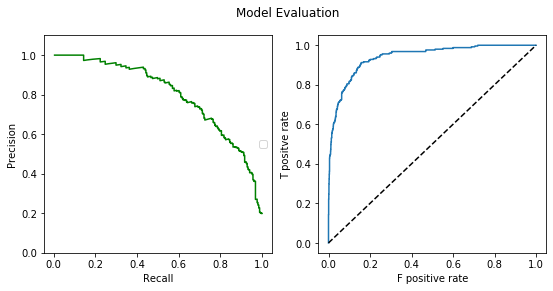

In [27]:
BinClassEval(rf, X_train, y_train, plot=True)

In [28]:
from sklearn.feature_selection import SelectKBest

In [29]:
X = SelectKBest(k=40).fit_transform(X_train, y_train)

In [30]:
grid_search = find_best_model(rf,grid,X,y_train,'CV set')
rf_kbest = grid_search.best_estimator_

CV MODEL RESULTS
{'max_depth': 5, 'max_leaf_nodes': 400, 'min_samples_leaf': 2, 'n_estimators': 10}
    mean_test_score  mean_train_score
18         0.418852          0.685208


No handles with labels found to put in legend.


Model has predict_proba.
AUC:  0.932
F1 score:  0.503
accuracy:  0.897


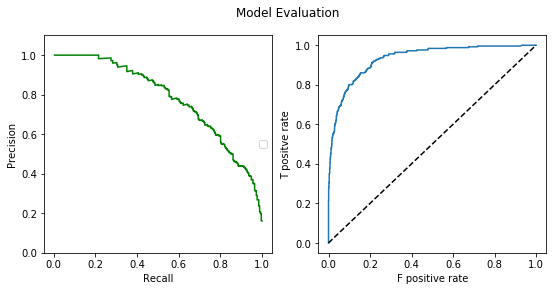

In [31]:
BinClassEval(rf_kbest, X, y_train, plot=True)

Feature selection seems to improve in case of RF (not the case in LGR). THink this result is good because this evaulation is biased (not CV-ed!). Performance was muhc lower in grid search validation set.

# Logging model and trianing results

Create first log df

model_log = pd.DataFrame(columns=['dataV','model','gridsearch','mean_train','mean_valid','notes'])

model_log

model_log.to_pickle('./../data/output/model_log.pkl')

In [32]:
from src.eval.eval_utils import save_model_to_log

In [34]:
save_model_to_log('./../data/output/model_log.pkl', 'v1', rf, grid_search, 'Random Forest 1st attempt with v1.')

Model logged.


In [35]:
pd.read_pickle('./../data/output/model_log.pkl')

,dataV,model,gridsearch,mean_train,mean_valid,notes
0,v1,"LogisticRegression(C=0.3, class_weight='balanc...",mean_fit_time std_fit_time mean_score_tim...,[0.629],[0.52],Initial model which was built on first edition...
1,v1,"(DecisionTreeClassifier(class_weight=None, cri...",mean_fit_time std_fit_time mean_score_ti...,[0.685],[0.419],Random Forest 1st attempt with v1.
